## Welcome to your first Data Project!
## Kaggle Titanic Challenge

In [1]:
import pandas as pd
from pandas import Series,DataFrame

# Set up the Titanic csv file as a DataFrame
titanic_df = pd.read_csv('train.csv')

# Let's see a preview of the data
titanic_df.head()

C:\Users\Chuang\Anaconda2\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# We could also get overall info for the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!

First some basic questions:

1. Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2. What deck were the passengers on and how does that relate to their class?
3. Where did the passengers come from?
4. Who was alone and who was with family?

Then we'll dig deeper, with a broader question:

5. What factors helped someone survive the sinking?

### 1st question: Who were the passengers on the titanic?

In [3]:
# Let's import what we'll need for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

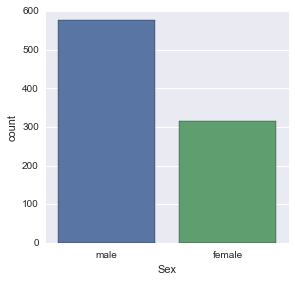

In [4]:
sns.factorplot('Sex', data = titanic_df, kind = "count")

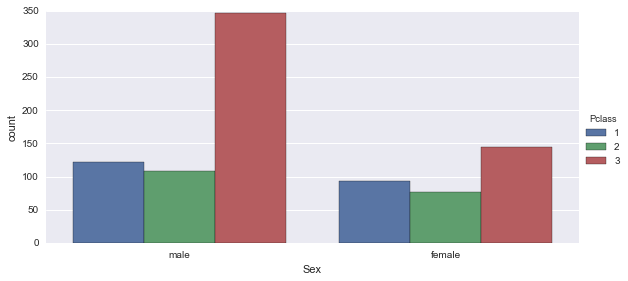

In [5]:
sns.factorplot('Sex', data = titanic_df, hue = 'Pclass', kind = 'count',size=4, aspect=2)

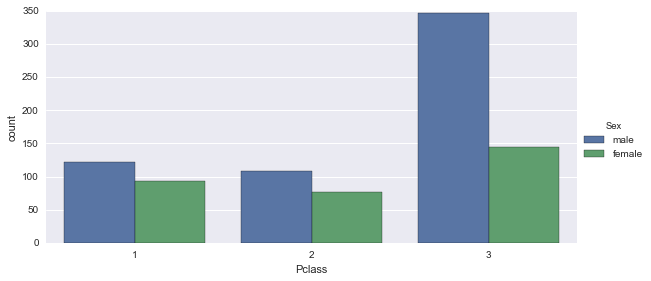

In [6]:
sns.factorplot('Pclass', data = titanic_df, hue = 'Sex', kind = 'count',size=4, aspect=2)

In [7]:
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [8]:
# remember to specify axis=1 for columns and not index.
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis = 1)

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


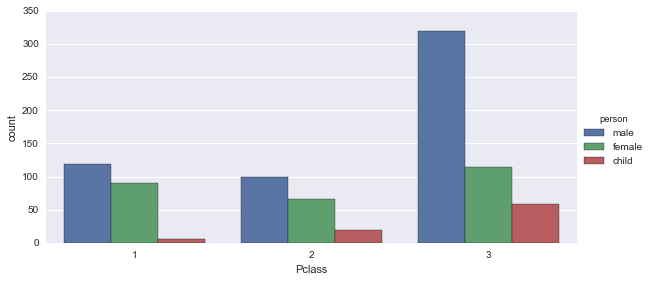

In [9]:
sns.factorplot('Pclass', data= titanic_df, hue = 'person',kind = 'count',size=4, aspect=2)

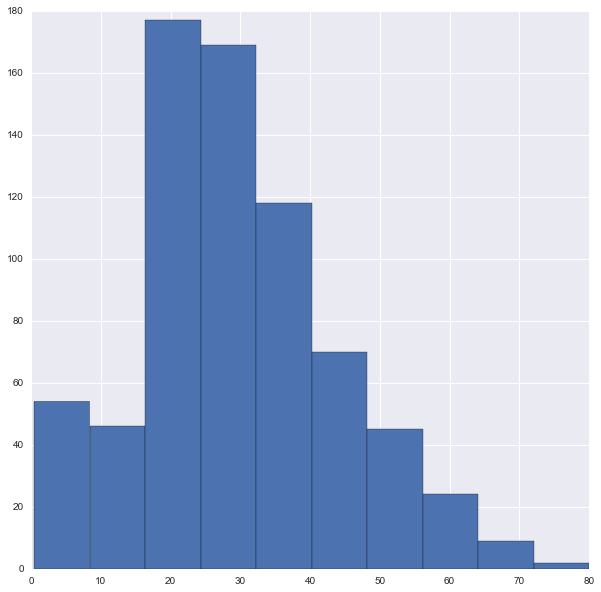

In [10]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

titanic_df['Age'].hist(bins = 10)

In [11]:
titanic_df['Age'].mean()

29.69911764705882

In [12]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

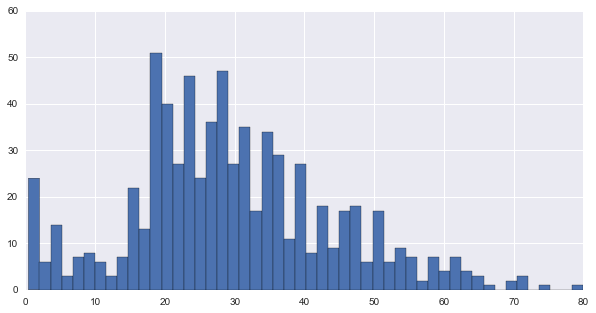

In [13]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (10.0, 5.0)

titanic_df['Age'].hist(bins = 50)

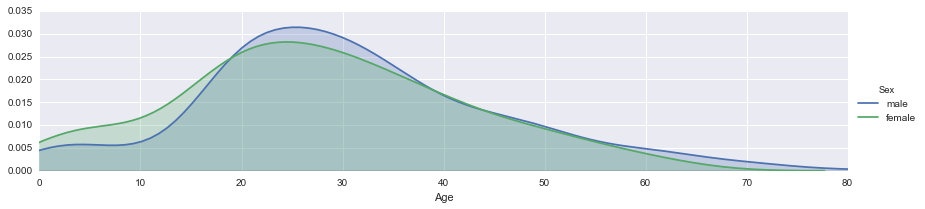

In [14]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(titanic_df, hue = 'Sex', aspect = 4)

fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0,oldest))

fig.add_legend()

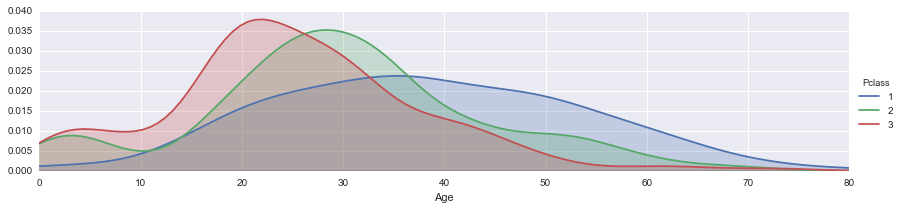

In [15]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

### 2nd question: What deck were the passengers on?

In [16]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [17]:
deck = titanic_df['Cabin'].dropna()

deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [18]:
levels = []
for item in deck:
    levels.append(item[0])
    
cabin_df = DataFrame(levels, columns = ['cabin'])
cabin_df.head()

,cabin
0,C
1,C
2,E
3,G
4,C


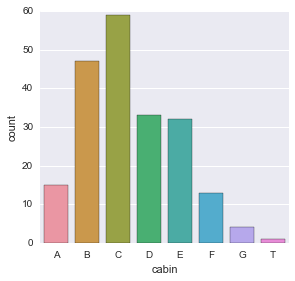

In [19]:
cabin_df = cabin_df.sort_values(by = 'cabin')

sns.factorplot('cabin', data = cabin_df, kind = 'count')

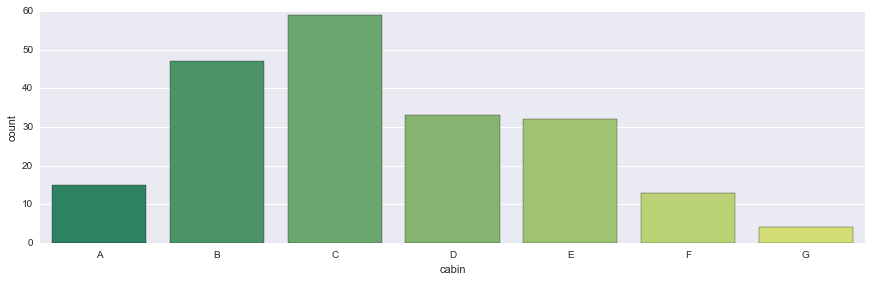

In [20]:
cabin_df = cabin_df[cabin_df.cabin != 'T']

sns.factorplot('cabin', data = cabin_df, kind = 'count', aspect=3, palette='summer')

### 3rd question: Where did the passengers come from?

In [21]:
# Let's take another look at our original data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


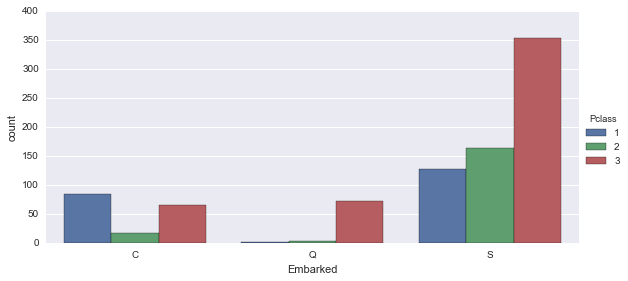

In [31]:
sns.factorplot('Embarked', data = titanic_df, hue = 'Pclass', kind = 'count', x_order=['C','Q','S'], aspect=2)

### 4th question: Who was alone and who was with family?

In [51]:
# We'll add the parent/child column with the sibsp column
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,1


Now we know that if the Alone column is anything but 0, then the passenger had family aboard and wasn't alone.

In [55]:
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'
titanic_df.head()

C:\Users\Chuang\Anaconda2\lib\site-packages\pandas\core\indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


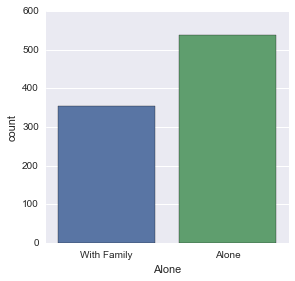

In [56]:
sns.factorplot('Alone', data = titanic_df, kind = 'count')

### Let's go ahead and take a look at the most interesting question: What factors helped someone survive the sinking?

In [66]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


In [64]:
titanic_df['Survivor'] = titanic_df.Survived.map({0: 'no', 1: 'yes'})

titanic_df['Survivor'].value_counts()

no     549
yes    342
Name: Survivor, dtype: int64

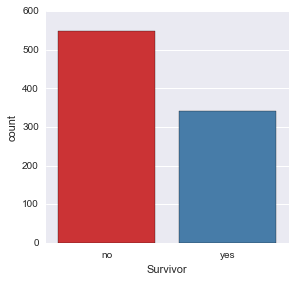

In [60]:
sns.factorplot('Survivor', data = titanic_df, kind = 'count', palette = 'Set1')

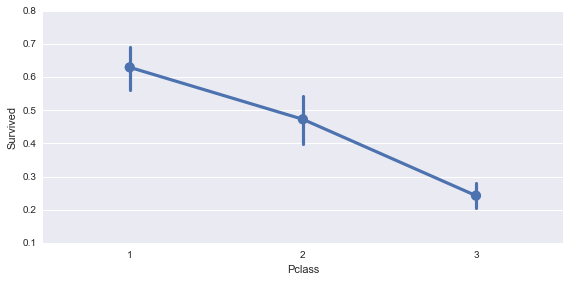

In [68]:
sns.factorplot('Pclass', 'Survived', data = titanic_df, kind = 'point', aspect=2)

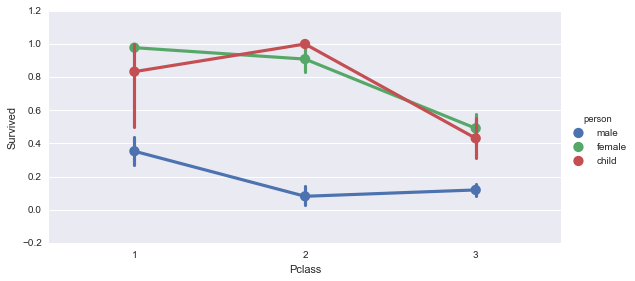

In [70]:
# Let's use a factor plot again, but now considering class and gender
sns.factorplot('Pclass','Survived',hue = 'person',data = titanic_df, kind = 'point', aspect=2)

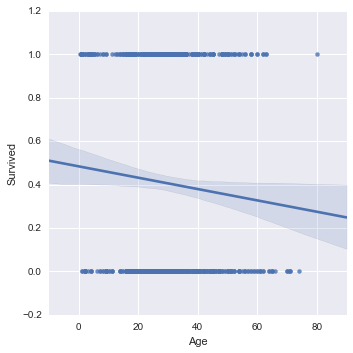

In [71]:
# age
sns.lmplot('Age', 'Survived', data = titanic_df)

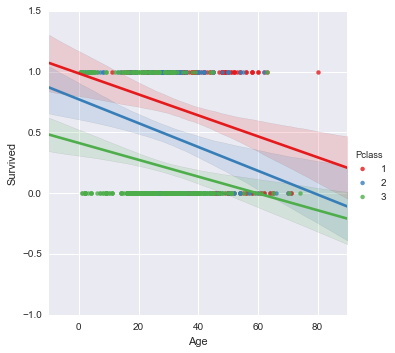

In [73]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot('Age', 'Survived', hue = 'Pclass', data = titanic_df, palette = 'Set1')

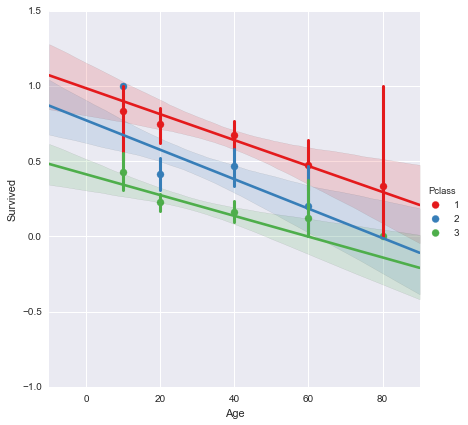

In [76]:
generations = [10,20,40,60,80]# add std on the plot

sns.lmplot('Age', 'Survived', hue = 'Pclass', data = titanic_df, palette = 'Set1', x_bins = generations, size = 6)

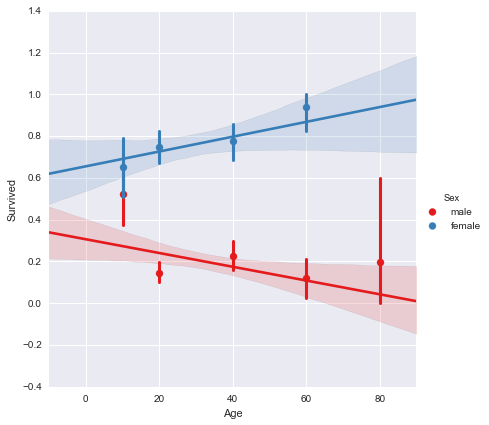

In [77]:
sns.lmplot('Age', 'Survived', hue = 'Sex', data = titanic_df, palette = 'Set1', x_bins = generations, size = 6)

Answer the following questions using pandas and seaborn:

1. Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?

In [78]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


In [136]:
sep = pd.notnull(titanic_df.Cabin)
New_titanic_df = titanic_df[sep]
New_titanic_df = New_titanic_df[['Cabin','Survivor']]
New_titanic_df.head()

,Cabin,Survivor
1,C85,yes
3,C123,yes
6,E46,no
10,G6,yes
11,C103,yes


In [147]:
level = []
for item in New_titanic_df['Cabin']:
    level.append(item[0])

New_titanic_df['New_Cabin'] = level
New_titanic_df.head()

,Cabin,Survivor,New_Cabin
1,C85,yes,C
3,C123,yes,C
6,E46,no,E
10,G6,yes,G
11,C103,yes,C


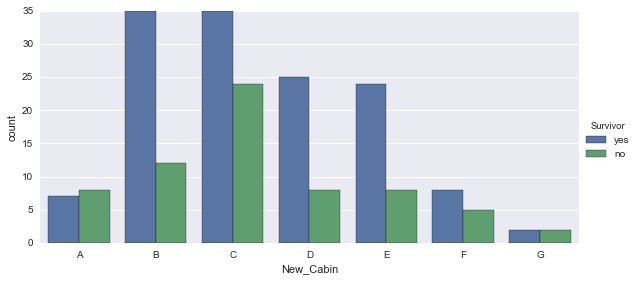

In [155]:
sns.factorplot('New_Cabin', hue = "Survivor", data = New_titanic_df, kind = 'count', size = 4, aspect = 2, 
               x_order = ['A','B','C','D','E','F','G'])

2.Did having a family member increase the odds of surviving the crash?

In [156]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


In [158]:
titanic_df['Family number'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Family number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,0


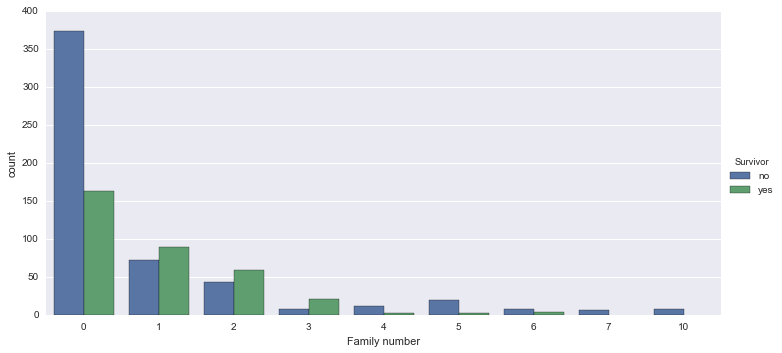

In [161]:
sns.factorplot('Family number', hue = 'Survivor', data = titanic_df, kind = 'count', size = 5, aspect = 2)